Los titulos de los graficos no serán visibles.


Paquetes necesarios.







In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=34f536c08081bccf7eee1eab0b5b9971a0a480e417f689d8d9d18fde3d172913
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
pip install squarify


In [ ]:
pip install joypy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')
import statsmodels.tsa.stattools as stattools
import scipy.cluster.hierarchy as shc
from matplotlib import patches
from scipy.spatial import ConvexHull
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.stats import sem
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
import squarify
import joypy


Importamos el dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset.csv")


Saving dataset.csv to dataset.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Descripción



In [ ]:
df.shape

(43400, 12)

In [ ]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
43395  children          Urban              58.64  20.4     never smoked   
43396  Govt_job          Urban             213.61  55.4  formerly smoked   
43397   Private          Urban              91.94  28.9  formerly smoked   
43398   Private          Urban              99.16  33.2     never smoked   
43399   Private          Urban              79.48  20.6     never smoked   

       stroke  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


edad esta como flotante, los otros estan correctos, hay que ver lo de objetos

In [ ]:
df.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

mínimo de edad no puede ser 0.8,
faltan datos de bmi


TRANSFORMACIÓN, NORMALIZACIÓN Y ELIMINACION

In [ ]:
#ejecutar
df=df.drop('id', axis=1)

In [ ]:
columna_edad=df['age']
print(columna_edad)

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43400, dtype: float64


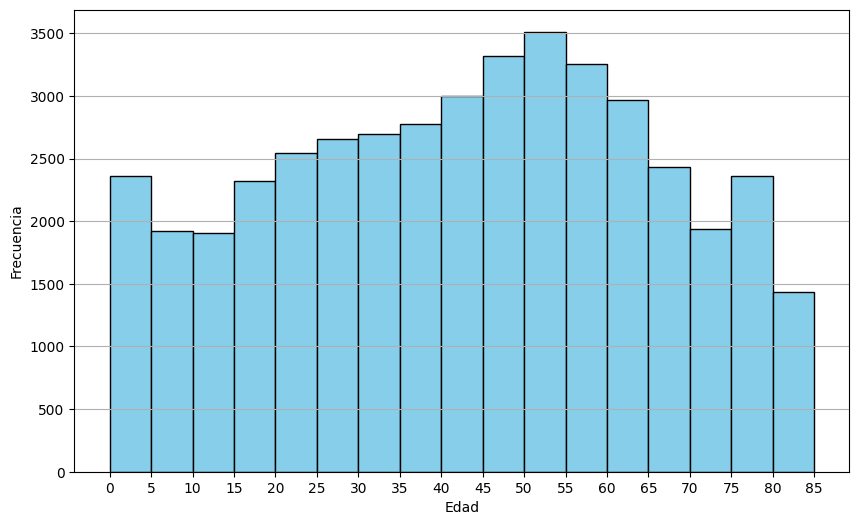

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=range(0, int(df['age'].max()) + 5, 5), color='skyblue', edgecolor='black')
#plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(range(0, int(df['age'].max()) + 5, 5))  # Establecer ticks en el eje x de 5 en 5
plt.grid(axis='y')
plt.show()

hacemos foco en edad para entrar en detalle y analizar por que es flotante y el minimo tan bajo

In [ ]:
#para encontrar los no enteros
no_enteros = df[df['age'] % 1 != 0]
print (no_enteros) #hay 1091 edades con coma de las 43400

       gender   age  hypertension  heart_disease ever_married work_type  \
116    Female  0.64             0              0           No  children   
129    Female  0.88             0              0           No  children   
321    Female  1.80             0              0           No  children   
323    Female  0.32             0              0           No  children   
356    Female  1.08             0              0           No  children   
...       ...   ...           ...            ...          ...       ...   
43325    Male  1.32             0              0           No  children   
43330  Female  0.72             0              0           No  children   
43341    Male  1.72             0              0           No  children   
43354  Female  1.40             0              0           No  children   
43369    Male  1.72             0              0           No  children   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
116            Urban        

aca empieza el analisis para ver si se eliminan los numeros no enteros de las edades (#se eliminaron)

In [ ]:
#posibles borrados
#comparar que no enteros coinciden con las filas esas que tengan nan
if 'bmi' in no_enteros.columns and 'smoking_status' in no_enteros.columns:
    res = no_enteros[
        no_enteros['bmi'].isna() & no_enteros['smoking_status'].isna()]
    print(res)

res.shape[0]

       gender   age  hypertension  heart_disease ever_married work_type  \
1813     Male  0.48             0              0           No  children   
3415     Male  1.88             0              0           No  children   
3516     Male  1.08             0              0           No  children   
3537     Male  1.80             0              0           No  children   
4765     Male  1.32             0              0           No  children   
6069     Male  0.88             0              0           No  children   
6342   Female  0.16             0              0           No  children   
6375     Male  1.40             0              0           No  children   
6541   Female  1.72             0              0           No  children   
7386   Female  0.24             0              0           No  children   
7742   Female  1.40             0              0           No  children   
7964     Male  1.72             0              0           No  children   
8212     Male  1.16      

39

comprobamos que no sean datos significativos en el analisis

In [ ]:
#NO ENTEROS CON HIPERTENSION
if 'hypertension' in no_enteros.columns:
    res = no_enteros[no_enteros['hypertension'] == 1]
    print(res)
    print("no enteros con hipertension:",res.shape[0])
    #no es necesario correr este (lo puse de nuevo porque se habia borrado)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
no enteros con hipertension: 0


In [ ]:
#NO ENTEROS CON UN ATAQUE CARDIACO
if 'heart_disease' in no_enteros.columns:
    res = no_enteros[no_enteros['heart_disease'] == 1]
    print(res)
    print("no enteros que tuvieron un infarto: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
no enteros que tuvieron un infarto:  0


In [ ]:
#NIVEL DE GLUCOSA MAYOR A 180 EN LAS EDADES NO ENTERAS
if 'avg_glucose_level' in no_enteros.columns:

    res = no_enteros[no_enteros['avg_glucose_level'] > 180] #Condicion
    print(res)
    print("no enteros de avg_glucose_level superiores a 180: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)


       gender   age  hypertension  heart_disease ever_married work_type  \
14150  Female  0.64             0              0           No  children   
16244    Male  0.88             0              0           No  children   
21114    Male  1.24             0              0           No  children   
23324    Male  0.80             0              0           No  children   
27265    Male  0.72             0              0           No  children   
37419  Female  1.56             0              0           No  children   
41351    Male  0.40             0              0           No  children   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
14150          Urban             198.74  16.3            NaN       0  
16244          Urban             208.25  21.8            NaN       0  
21114          Urban             181.81  22.9            NaN       0  
23324          Urban             205.63  21.7            NaN       0  
27265          Rural             183.91  18.

In [ ]:
glucosaaltadenoenteros=no_enteros[no_enteros['avg_glucose_level'] <70].shape[0]
glucosaaltadenoenteros
othereliminados=no_enteros[no_enteros['gender']=="other"]
othereliminados

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
#NIVEL DE GLUCOSA MENOR A 70
if 'avg_glucose_level' in no_enteros.columns:
    res = no_enteros[no_enteros['avg_glucose_level'] < 70] #condicion
    print(res)
    print("no enteros de avg_glucose_level inferiores a 70: ", res.shape[0])
     #no es necesario correr este (lo puse de nuevo porque se habia borrado)

       gender   age  hypertension  heart_disease ever_married work_type  \
321    Female  1.80             0              0           No  children   
356    Female  1.08             0              0           No  children   
514    Female  1.16             0              0           No  children   
861    Female  0.32             0              0           No  children   
869      Male  1.64             0              0           No  children   
...       ...   ...           ...            ...          ...       ...   
42615  Female  1.64             0              0           No  children   
42790    Male  1.08             0              0           No  children   
43093  Female  1.72             0              0           No  children   
43158    Male  1.88             0              0           No  children   
43269  Female  1.64             0              0           No  children   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
321            Urban        

In [ ]:
#HAY QUE CORRERLO
#eliminacion de filas de todos los numeros no enteros (1091)
indices_a_eliminar = df[df['age'] % 1 != 0].index
df = df.drop(indices_a_eliminar)
df.shape


(42309, 11)

In [ ]:
#HAY QUE CORRERLO
#ponemos en el mismo formato todas las columnas
df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

print(df)

       gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      residence_type  avg_glucose_level   bmi   smo

In [ ]:
df["age"]

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 42309, dtype: float64

In [ ]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  42309.000000  42309.000000   42309.000000       42309.000000   
mean      43.279350      0.095984       0.048737         104.789186   
std       21.803304      0.294573       0.215320          43.448966   
min        1.000000      0.000000       0.000000          55.000000   
25%       26.000000      0.000000       0.000000          77.570000   
50%       45.000000      0.000000       0.000000          91.650000   
75%       60.000000      0.000000       0.000000         112.260000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  40886.000000  42309.000000  
mean      28.878604      0.018483  
std        7.664070      0.134692  
min       10.100000      0.000000  
25%       23.600000      0.000000  
50%       28.000000      0.000000  
75%       33.000000      0.000000  
max       97.600000      1.000000

analizamos que no modifique mucho y verificamos que el minimo de edad sea 1.

ESTANDARIZACION DE LOS DATOS:

In [ ]:
#correrlo si o si
df['age'] = df['age'].astype(int) #ya son todos enteros

In [ ]:
df['age'].describe()

count    42309.000000
mean        43.279350
std         21.803304
min          1.000000
25%         26.000000
50%         45.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [ ]:
df.describe() #verificamos

age  hypertension  heart_disease  avg_glucose_level  \
count  42309.000000  42309.000000   42309.000000       42309.000000   
mean      43.279350      0.095984       0.048737         104.789186   
std       21.803304      0.294573       0.215320          43.448966   
min        1.000000      0.000000       0.000000          55.000000   
25%       26.000000      0.000000       0.000000          77.570000   
50%       45.000000      0.000000       0.000000          91.650000   
75%       60.000000      0.000000       0.000000         112.260000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  40886.000000  42309.000000  
mean      28.878604      0.018483  
std        7.664070      0.134692  
min       10.100000      0.000000  
25%       23.600000      0.000000  
50%       28.000000      0.000000  
75%       33.000000      0.000000  
max       97.600000      1.000000

In [ ]:
#COMPROBACION DE QUE LAS EDADES SEAN VALIDAS
edades_menores= df[df['age'] < 0]
edades_mayores = df[df['age'] > 100]

print("menores a 0:")
print(edades_menores)

print("mayores a 100:")
print(edades_mayores)

invalidas_menores = (df['age'] < 0).sum()

invalidas_mayores= (df['age'] > 100).sum()

print(" menores a 0:", invalidas_menores)
print("mayores a 100:", invalidas_mayores)


#TODO EN ORDEN

menores a 0:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
mayores a 100:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
 menores a 0: 0
mayores a 100: 0


In [ ]:
residencia=df['residence_type'].value_counts()
print (residencia)

residence_type
Urban    21191
Rural    21118
Name: count, dtype: int64


In [ ]:
df['age'].describe()

count    42309.000000
mean        43.279350
std         21.803304
min          1.000000
25%         26.000000
50%         45.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [ ]:
infantes= df[df['age']<6]
print ("infantes:" ,infantes)

niños=df[(df['age']>6)& (df['age'] <12)]
print ("niños: ",niños)

adolescentes= df[(df['age']>12)& (df['age'] <24)]
print("adolescentes: ",adolescentes)

adultos=df[(df['age']>24)& (df['age'] <50)]
print ("adultos: ",adultos)

adultos_mayores= df[df['age']>50]
print("adultos mayores: ",adultos_mayores)


infantes:        gender  age  hypertension  heart_disease ever_married work_type  \
0        Male    3             0              0           No  children   
33     Female    3             0              0           No  children   
42       Male    4             0              0           No  children   
122    Female    4             0              0           No  children   
133      Male    4             0              0           No  children   
...       ...  ...           ...            ...          ...       ...   
43229  Female    4             0              0           No  children   
43271  Female    5             0              0           No  children   
43282    Male    3             0              0           No  children   
43352    Male    2             0              0           No  children   
43376  Female    3             0              0           No  children   

      residence_type  avg_glucose_level   bmi smoking_status  stroke  
0              Rural          

In [ ]:
generos=df['gender'].value_counts()
print (generos)
#los valores estan bien

gender
Female    25129
Male      17169
Other        11
Name: count, dtype: int64


In [ ]:
otro_genero=df[df['gender']=="Other"]
print(otro_genero)
otro_genero.shape

      gender  age  hypertension  heart_disease ever_married work_type  \
2914   Other   26             0              0           No   Private   
10768  Other   46             0              0           No   Private   
15620  Other   27             0              0           No   Private   
15838  Other   53             0              0          Yes   Private   
19748  Other   39             0              0          Yes  Govt_job   
21041  Other   19             0              0           No   Private   
21192  Other   49             0              0          Yes   Private   
24252  Other   51             0              0          Yes   Private   
26199  Other   10             0              0           No  children   
26831  Other   53             0              0          Yes  Govt_job   
40768  Other   11             0              0           No  children   

      residence_type  avg_glucose_level   bmi   smoking_status  stroke  
2914           Rural             143.33  22.4  for

(11, 11)

son 11 valores que capaz podemos omitir para simplificar los grafico

In [ ]:
hypertension_count = otro_genero['hypertension'].sum()
heart_disease_count = otro_genero['heart_disease'].sum()
stroke_count = otro_genero['stroke'].sum()

print("hipertension:",hypertension_count)
print("desorden cardiaco", heart_disease_count)
print("acv:", stroke_count)

hipertension: 0
desorden cardiaco 0
acv: 0


In [ ]:
trabajos=df['work_type'].value_counts()
print(trabajos) #hay que reemplazar children por Children para que sea del mismo modo todos

work_type
Private          24834
Self-employed     6793
Govt_job          5440
children          5065
Never_worked       177
Name: count, dtype: int64


In [ ]:
#EJECUTAR
#cambio de tipo de trabajos
df['work_type'] = df['work_type'].replace('children', 'Children')  #se reemplaza children por Children para que sea del mismo modo todos
#comprobacion
trabajos=df['work_type'].value_counts()
print(trabajos)

work_type
Private          24834
Self-employed     6793
Govt_job          5440
Children          5065
Never_worked       177
Name: count, dtype: int64


revisar si se cambia o no el tipo

In [ ]:
fumador=df['smoking_status'].value_counts()
print (fumador)#se va a pasar a mayusculas igual que el resto de categorias

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64


In [ ]:
#ejecutar
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 'Never smoked',
    'formerly smoked': 'Formerly smoked',
    'smokes': 'Smokes'
})
#comprobamos
fumador=df['smoking_status'].value_counts()
print (fumador)


smoking_status
Never smoked       16053
Formerly smoked     7493
Smokes              6562
Name: count, dtype: int64


LIMPIEZA DE LOS DATOS


In [ ]:
#ejecutar
df['work_type'] = df['work_type'].replace({
    'Private': 'Private',
    'Self-employed': 'Self employed',
    'Govt_job': 'Govt job',
    'Children': 'Children',
    'Never_worked': 'Never worked'
})

print(df)

       gender  age  hypertension  heart_disease ever_married     work_type  \
0        Male    3             0              0           No      Children   
1        Male   58             1              0          Yes       Private   
2      Female    8             0              0           No       Private   
3      Female   70             0              0          Yes       Private   
4        Male   14             0              0           No  Never worked   
...       ...  ...           ...            ...          ...           ...   
43395  Female   10             0              0           No      Children   
43396  Female   56             0              0          Yes      Govt job   
43397  Female   82             1              0          Yes       Private   
43398    Male   40             0              0          Yes       Private   
43399  Female   82             0              0          Yes       Private   

      residence_type  avg_glucose_level   bmi   smoking_status 

In [ ]:
df['work_type'].value_counts()

work_type
Private          24834
Self employed     6793
Govt job          5440
Children          5065
Never worked       177
Name: count, dtype: int64

In [ ]:
df.duplicated().sum() #comprobamos que no haya duplicados

0

In [ ]:
nulogenero_df=df[df["gender"].isna( )] #comprobamos que la variable género no tenga nan.
nulogenero_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nuloedad_df=df[df["age"].isna( )]
nuloedad_df #comprobamos que la columna edad no tenga NaN.

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nulohipertension_df=df[df["hypertension"].isna( )]
nulohipertension_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nulocardiopatia_df=df[df["heart_disease"].isna( )]
nulocardiopatia_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nulocasado_df=df[df["ever_married"].isna( )]
nulocasado_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nulotipotrabajo_df=df[df["work_type"].isna( )]
nulotipotrabajo_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nuloresidencia_df=df[df["residence_type"].isna( )]
nuloresidencia_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nuloglucosa_df=df[df["avg_glucose_level"].isna( )]
nuloglucosa_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
nulobmi_df=df[df["bmi"].isna( )] #hay 1423 faltantes
nulobmi_df


gender  age  hypertension  heart_disease ever_married      work_type  \
81     Female   61             0              0          Yes  Self employed   
95       Male   34             0              1          Yes        Private   
113    Female   76             1              0          Yes  Self employed   
186    Female   63             0              0          Yes       Govt job   
231      Male   61             0              0          Yes       Govt job   
...       ...  ...           ...            ...          ...            ...   
43317  Female   62             0              1          Yes       Govt job   
43339  Female   76             0              0           No        Private   
43351  Female   58             1              0          Yes        Private   
43371  Female   78             0              0          Yes        Private   
43388  Female   64             1              0          Yes       Govt job   

      residence_type  avg_glucose_level  bmi   smoking_status  stroke  
81             Rural             202.21  NaN     Never smoked       1  
95             Urban             106.23  NaN  Formerly smoked       0  
113            Urban             209.58  NaN     Never smoked       0  
186            Rural              79.92  NaN           Smokes       0  
231            Urban             184.15  NaN              NaN       0  
...              ...                ...  ...              ...     ...  
43317          Urban              72.29  NaN     Never smoked       0  
43339          Rural             100.55  NaN     Never smoked       1  
43351          Urban              99.29  NaN              NaN       0  
43371          Urban             182.45  NaN  Formerly smoked       0  
43388          Rural             228.43  NaN           Smokes       0  

[1423 rows x 11 columns]

In [ ]:
nulofumador_df=df[df["smoking_status"].isna( )]
nulofumador_df#hay 12201 datos faltantes en la columna estado de fumar


gender  age  hypertension  heart_disease ever_married      work_type  \
0        Male    3             0              0           No       Children   
2      Female    8             0              0           No        Private   
4        Male   14             0              0           No   Never worked   
5      Female   47             0              0          Yes        Private   
10     Female   79             0              0          Yes       Govt job   
...       ...  ...           ...            ...          ...            ...   
43382  Female    9             0              0           No       Children   
43385  Female   66             0              0          Yes  Self employed   
43389    Male   14             0              0           No       Children   
43391    Male    6             0              0           No       Children   
43392  Female   18             0              0           No        Private   

      residence_type  avg_glucose_level   bmi smoking_status  stroke  
0              Rural              95.12  18.0            NaN       0  
2              Urban             110.89  17.6            NaN       0  
4              Rural             161.28  19.1            NaN       0  
5              Urban             210.95  50.1            NaN       0  
10             Urban              77.08  35.0            NaN       0  
...              ...                ...   ...            ...     ...  
43382          Urban              68.49  16.8            NaN       0  
43385          Urban              92.10  24.8            NaN       0  
43389          Urban              82.48  24.8            NaN       0  
43391          Urban              77.48  19.1            NaN       0  
43392          Urban             131.96  22.8            NaN       0  

[12201 rows x 11 columns]

In [ ]:
nuloACV_df=df[df["stroke"].isna( )]
nuloACV_df

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

ANALISIS PARA VER QUE HACEMOS CON LOS DATOS FALTANTES DE BMI Y SMOKING

In [ ]:
promediobmi=df["bmi"].mean()
promediobmi #promedio del bmi es 28,9
nonulobmi_df=df[df["bmi"].notna( )]
promediobmi


28.878603923103267

comenzamos a observar que el promedio de bmi indica sobrepeso.



In [ ]:
infantes.shape[0] #hay 1804 infantes
niños.shape[0] #hay 1787 ninos
adolescentes.shape[0] #hay 5223 adolescentes
adultos.shape[0] #hay 14449 adultos
adultos_mayores.shape[0] #hay 17202
#hay 31.651 mayores y 8814 menores.


17202

el promedio es acorde ya de por si porque el 75% de los datos son de adultos/personas mayores.

In [ ]:
nulobmi_df#eran 1423 nulos
bmiporglucosaalto=nulobmi_df[nulobmi_df["avg_glucose_level"]>110]
bmiporglucosaalto #la mitad de los datos faltantes de bmi son de personas con el nivel de glucosa alto
bmiyedad_df=nulobmi_df[["bmi","age"]]
bmiporedadalto_df=bmiyedad_df[bmiyedad_df["age"]>40]
bmiporedadalto_df  #2/3 de los datos faltantes de bmi son de personas con edad alta
bmyyacv_df=nulobmi_df[["bmi","stroke"]]
bmyyacv_df #la mitad de los datos faltantes de bmi son de personas con ACV
bmiporacv_df=nulobmi_df[nulobmi_df["stroke"]==0]
bmiporacv_df #casi todos los datos faltantes de bmi son de personas que no tienen ACV.
bmiporgenero_df=nulobmi_df[nulobmi_df["gender"]=="Male"]
bmiporgenero_df#se reparte mitad y mitad
bmiporedadalto_df
bmiyfumar=nulobmi_df[nulobmi_df["avg_glucose_level"]=="never smoked"]
bmiyfumar #todos los datos faltantes de bmi son de personas que no fuman
bmiyhipertension=nulobmi_df[["bmi","hypertension"]]
bmiyhipertension=nulobmi_df[nulobmi_df["hypertension"]==0]
bmiyhipertension #2/3 de todos los datos faltantes de bmi son de los que no tienen hipertension.
bmiycardiopatia=nulobmi_df[nulobmi_df["heart_disease"]==0]
ohter=nulobmi_df[nulobmi_df["gender"]=="Other"]
bmiyhipertension

gender  age  hypertension  heart_disease ever_married      work_type  \
81     Female   61             0              0          Yes  Self employed   
95       Male   34             0              1          Yes        Private   
186    Female   63             0              0          Yes       Govt job   
231      Male   61             0              0          Yes       Govt job   
278      Male   40             0              0          Yes        Private   
...       ...  ...           ...            ...          ...            ...   
43252  Female   49             0              0          Yes        Private   
43283  Female   30             0              0           No  Self employed   
43317  Female   62             0              1          Yes       Govt job   
43339  Female   76             0              0           No        Private   
43371  Female   78             0              0          Yes        Private   

      residence_type  avg_glucose_level  bmi   smoking_status  stroke  
81             Rural             202.21  NaN     Never smoked       1  
95             Urban             106.23  NaN  Formerly smoked       0  
186            Rural              79.92  NaN           Smokes       0  
231            Urban             184.15  NaN              NaN       0  
278            Rural              89.77  NaN           Smokes       0  
...              ...                ...  ...              ...     ...  
43252          Urban              81.50  NaN  Formerly smoked       0  
43283          Urban             258.24  NaN     Never smoked       0  
43317          Urban              72.29  NaN     Never smoked       0  
43339          Rural             100.55  NaN     Never smoked       1  
43371          Urban             182.45  NaN  Formerly smoked       0  

[1032 rows x 11 columns]

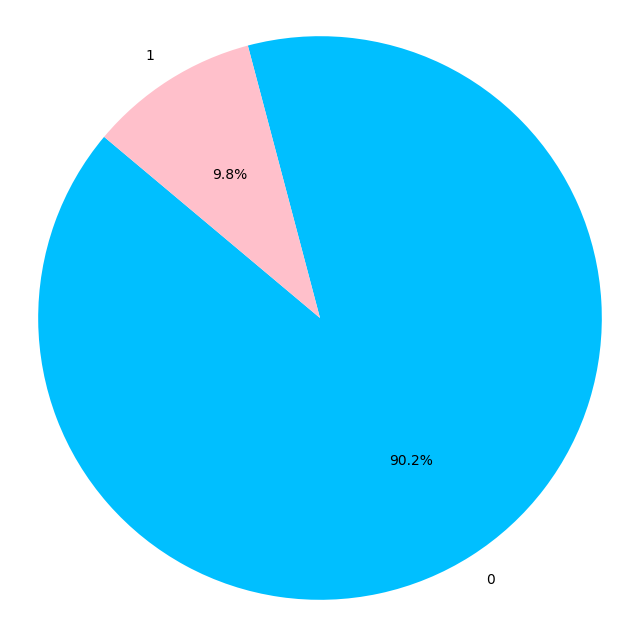

In [ ]:
df_ec = bmyyacv_df.groupby('stroke').size()
plt.figure(figsize=(8, 8))
plt.pie(df_ec, labels=df_ec.index, autopct='%1.1f%%', colors=['deepskyblue', 'pink'], startangle=140)
plt.axis('equal')
plt.show()


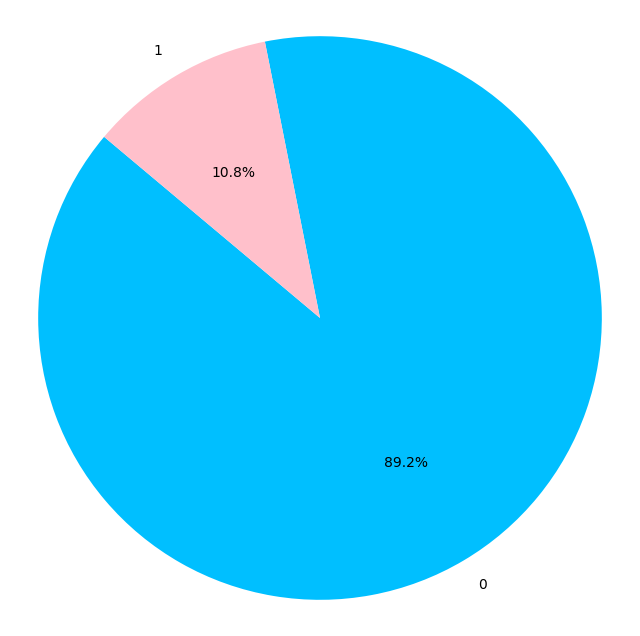

In [ ]:
df_ec = bmiyhipertension.groupby('stroke').size()
plt.figure(figsize=(8, 8))
plt.pie(df_ec, labels=df_ec.index, autopct='%1.1f%%', colors=['deepskyblue', 'pink'], startangle=140)
plt.axis('equal')
plt.show()

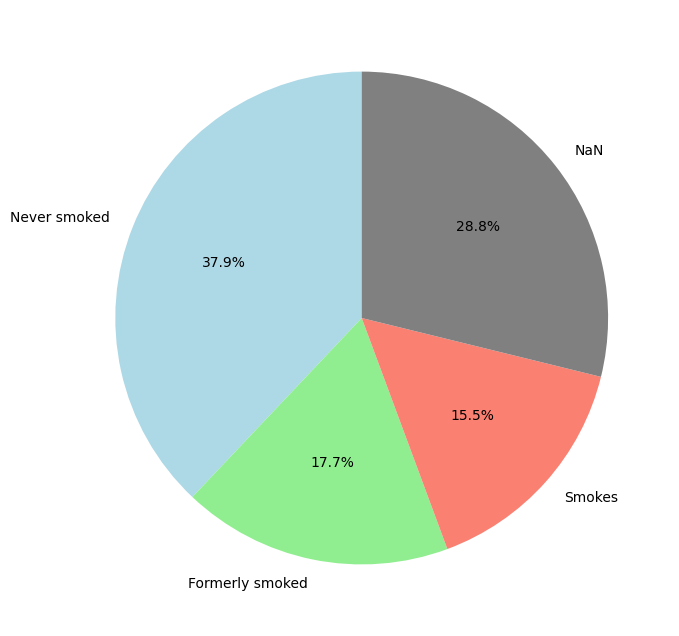

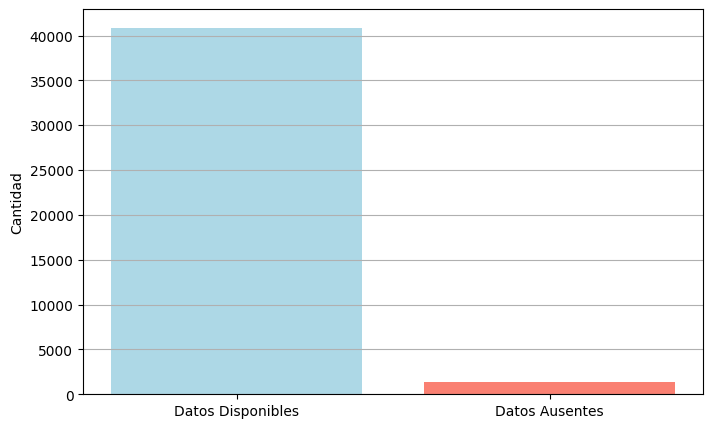

In [ ]:
#EJECUTAR
# Contar las categorías y NaN
smoking_counts = df['smoking_status'].value_counts()
nan_count = df['smoking_status'].isna().sum()

# Añadir NaN a los conteos
smoking_counts['NaN'] = nan_count

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
smoking_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon', 'grey'])
#plt.title('Distribución de Smoking Status con NaN')
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.show()

# Contar los datos disponibles y ausentes
available_count = df['bmi'].count()
nan_count = df['bmi'].isna().sum()

# Crear un DataFrame para el gráfico de barras
data = {'Estado': ['Datos Disponibles', 'Datos Ausentes'],
        'Cantidad': [available_count, nan_count]}
df_plot = pd.DataFrame(data)

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_plot['Estado'], df_plot['Cantidad'], color=['lightblue', 'salmon'])
#plt.title('Datos de BMI: Disponibles vs Ausentes')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

In [ ]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  42309.000000  42309.000000   42309.000000       42309.000000   
mean      43.279350      0.095984       0.048737         104.789186   
std       21.803304      0.294573       0.215320          43.448966   
min        1.000000      0.000000       0.000000          55.000000   
25%       26.000000      0.000000       0.000000          77.570000   
50%       45.000000      0.000000       0.000000          91.650000   
75%       60.000000      0.000000       0.000000         112.260000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  40886.000000  42309.000000  
mean      28.878604      0.018483  
std        7.664070      0.134692  
min       10.100000      0.000000  
25%       23.600000      0.000000  
50%       28.000000      0.000000  
75%       33.000000      0.000000  
max       97.600000      1.000000

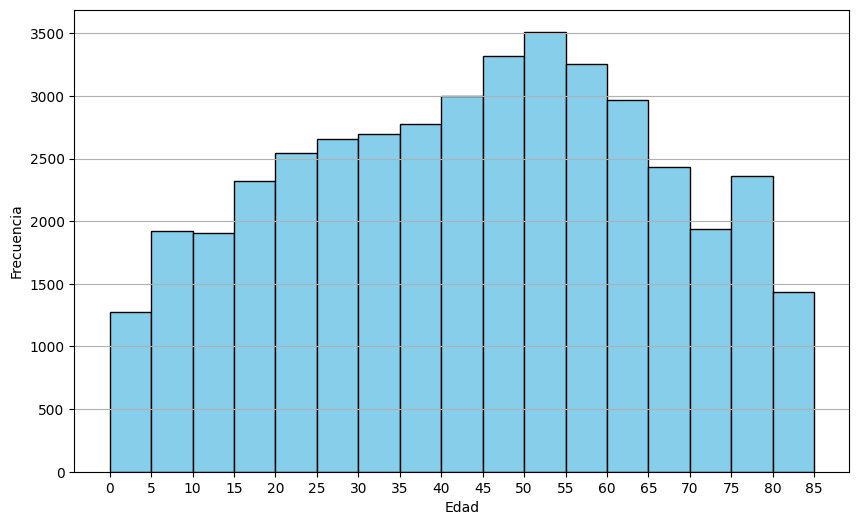

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=range(0, int(df['age'].max()) + 5, 5), color='skyblue', edgecolor='black')
#plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(range(0, int(df['age'].max()) + 5, 5))  # Establecer ticks en el eje x de 5 en 5
plt.grid(axis='y')
plt.show()

In [ ]:
df['age'].describe()

count    42309.000000
mean        43.279350
std         21.803304
min          1.000000
25%         26.000000
50%         45.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [ ]:

glucosa_alta = 110
bminulo_glucosa_alta = df[(df['bmi'].isna()) & (df['avg_glucose_level'] > glucosa_alta)]

bminulo_glucosa_alta_filtrado = bminulo_glucosa_alta[(bminulo_glucosa_alta['age'] >= 25) & (bminulo_glucosa_alta['age'] <= 70)]

edad_min = bminulo_glucosa_alta_filtrado['age'].min()
edad_max = bminulo_glucosa_alta_filtrado['age'].max()

edad_mediana = bminulo_glucosa_alta_filtrado['age'].median()

print("El rango de edad para los bminulos con glucosa alta es: ", edad_min, "a", edad_max)
print("La mediana de edad para los bminulos con glucosa alta es: ",edad_mediana)


El rango de edad para los bminulos con glucosa alta es:  25 a 70
La mediana de edad para los bminulos con glucosa alta es:  57.0


analisis para confirmar que la glucosa es alta

([<matplotlib.axis.YTick at 0x79ec8d8bf640>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

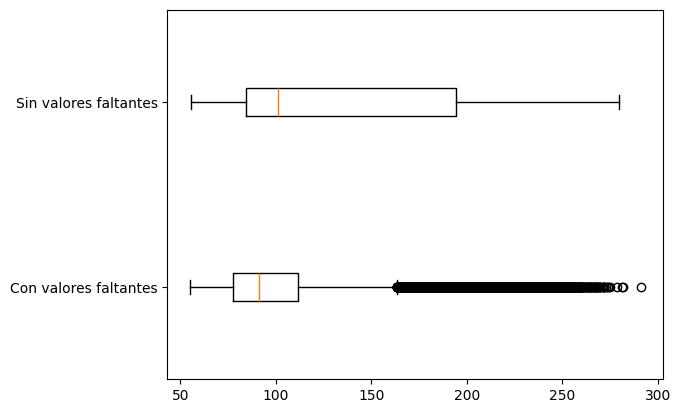

In [ ]:
#bmi y glucosa
BM_MV=df.bmi.isna() #devuelve false si los valores no son nulos y true si son nulos
MV_labels=("Con valores faltantes","Sin valores faltantes") #lista con los titulos del grafico
box_sr=pd.Series(" ",index=BM_MV.unique()) #lista de valores unicos de bm
for poss in BM_MV.unique(): #itera sobre lo valores unicos de BM_MV
  BM = BM_MV == poss  #crea serie booleana donde si  poss es true cada valor va a ser true si el valor en BM_MV es True
  box_sr[poss]=df[BM].avg_glucose_level #se actualiza box_sr donde si poss es true entonces box_sr en la posicion true contendra las temperaturas donde faltan datos
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

Con este grafico comprobamos que el valor la glucosa cambia significativamente entre las dos poblaciones. Esto muestra que un cambio de glucosa podría haber causado o influido en la aparición de valores faltantes en el BMI.

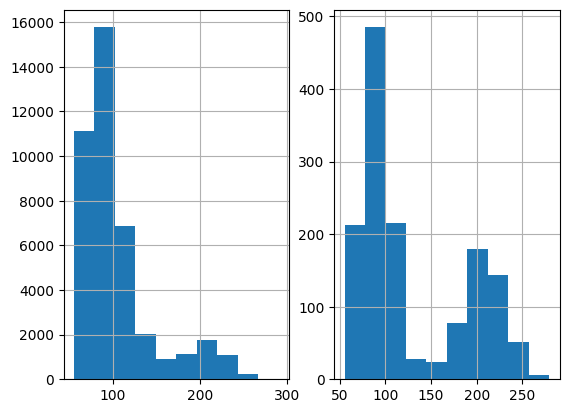

In [ ]:
#bmi y glucosa
BM_MV=df.bmi.isna()
glucosa_range=(df.avg_glucose_level.min(),df.avg_glucose_level.max())
for i, poss in enumerate(BM_MV.unique()): #recorre los valores unicos de BM_MV y los asigna a la variable poss. i guarda para controlar las posiciones de los subgraficos
  plt.subplot(1,2,i+1) #permite mostrar los histogramas uno al lado del otro, crea una figura con disposicion de los subgraficos de 1 fila y 2 columnas y selecciona el subgrafico en la posicion i.
  BM=BM_MV==poss #serie que guarda las filas donde BM_MV coincide con poss
  df[BM].avg_glucose_level.hist() #crea un histograma de la variable para las filas de bm
  plt.xlim=glucosa_range #agrega los limites.
plt.show()

se ve una diferencia

([<matplotlib.axis.YTick at 0x79ec8b279e70>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

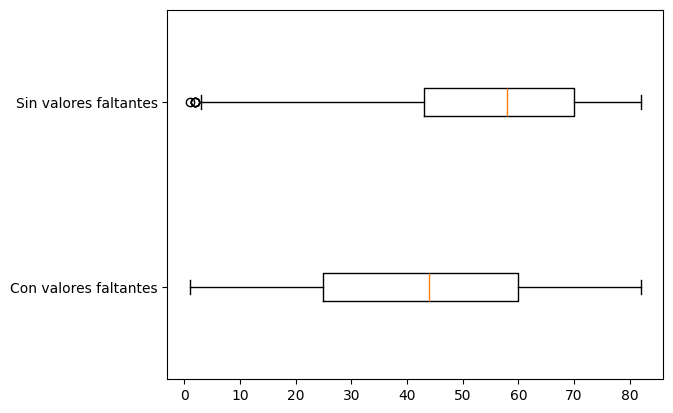

In [ ]:
#edad y bmi
BM_MV=df.bmi.isna()
MV_labels=("Con valores faltantes","Sin valores faltantes")
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].age
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no es tan distinto, veamos el histograma

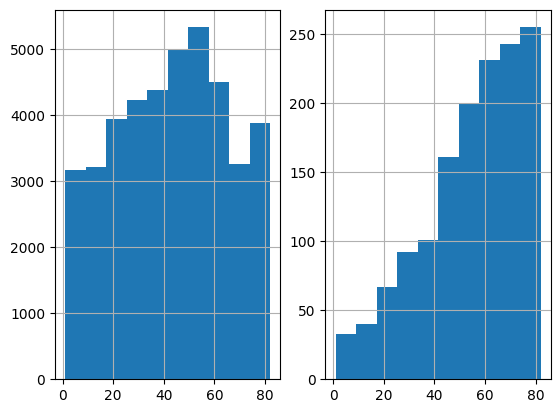

In [ ]:
#edad y bmi
BM_MV=df.bmi.isna()
edad_range=(df.age.min(),df.age.max())
MV_labels=("Con valores faltantes","Sin valores faltantes")
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].age.hist()
  plt.xlim=edad_range
  plt.title=MV_labels
plt.show()

se observa como cambia la distribución

([<matplotlib.axis.YTick at 0x79ec8dc9ded0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

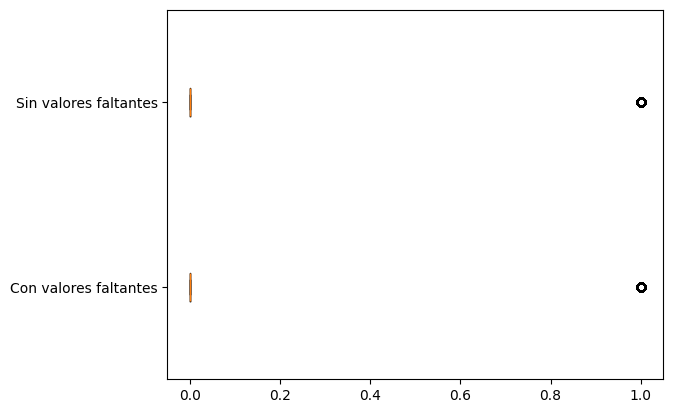

In [ ]:
#bmi y enfermedad corazon
BM_MV=df.bmi.isna()
MV_labels=("Con valores faltantes","Sin valores faltantes")
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].heart_disease
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no hay diferencia por lo que los valores faltantes no debe depender
de heart disease

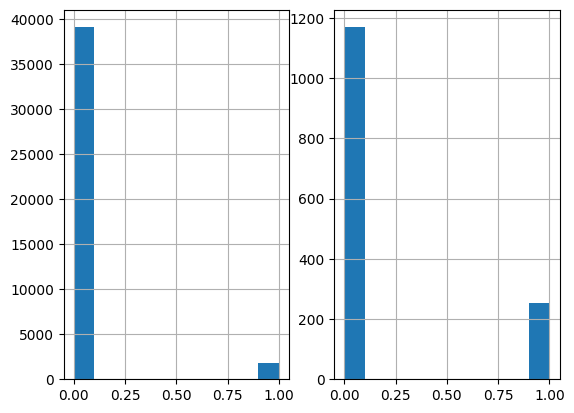

In [ ]:
#bmi y enfermedad del corazon
BM_MV=df.bmi.isna()
hypertension_range=(df.heart_disease.min(),df.heart_disease.max())
MV_labels=("Con valores faltantes","Sin valores faltantes")
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].heart_disease.hist()
  plt.xlim=hypertension_range
  plt.title=MV_labels
plt.show()

son similares asi que arribamos a la misma conclusión.

([<matplotlib.axis.YTick at 0x79ec8d837f40>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

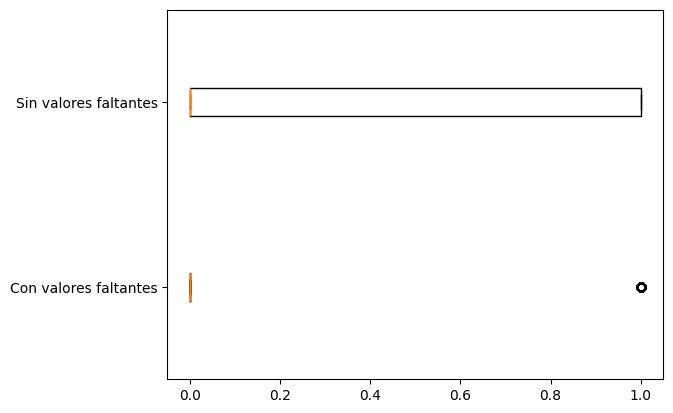

In [ ]:
#bmi y hipertension
BM_MV=df.bmi.isna()
MV_labels=("Con valores faltantes","Sin valores faltantes")
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].hypertension
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

veamos qué ocurre con el histograma

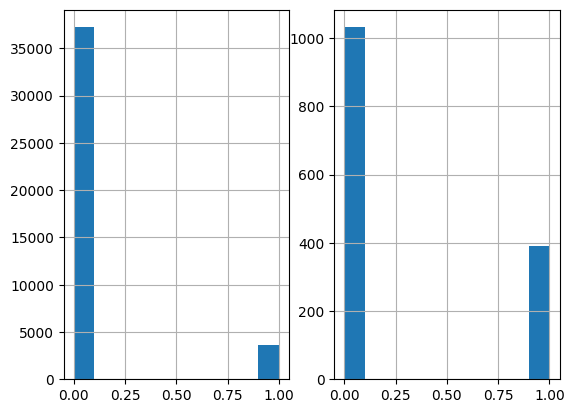

In [ ]:
#bmi y hipertension
BM_MV=df.bmi.isna()
hypertension_range=(df.hypertension.min(),df.hypertension.max())
MV_labels=("Con valores faltantes","Sin valores faltantes")
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].hypertension.hist()
  plt.xlim=hypertension_range
  plt.title=MV_labels
plt.show()

([<matplotlib.axis.YTick at 0x79ec8b0c3ca0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

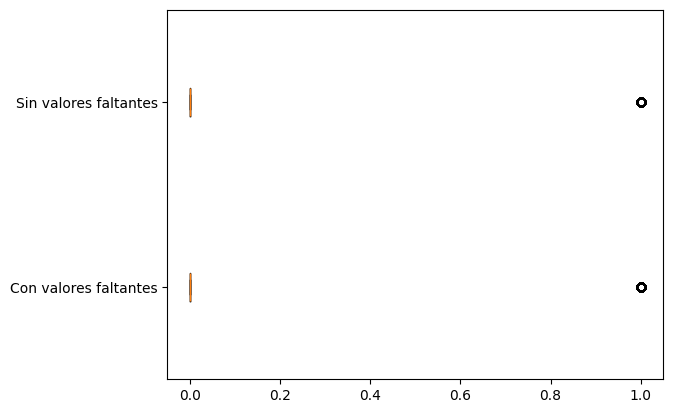

In [ ]:
#bmi y acv
BM_MV=df.bmi.isna()
MV_labels=("Con valores faltantes","Sin valores faltantes")
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].stroke
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no hay diferencias

<Axes: >

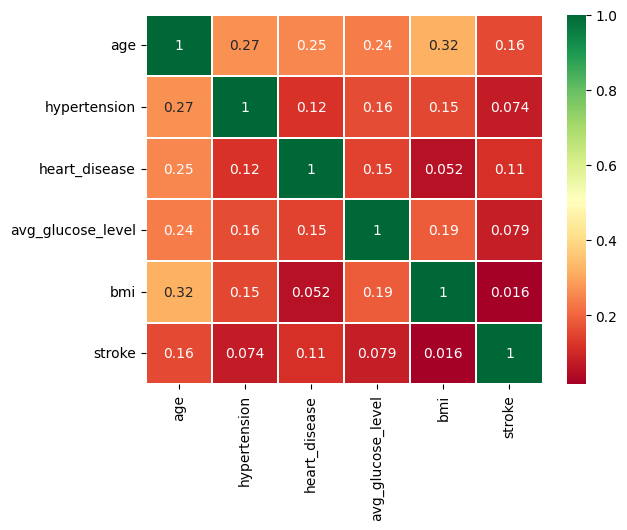

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
#no tocarlo

El grafico nos muestra que no hay una relación significativa entre las variables por lo que vamos a proceder a eliminar los datos NaN del bmi.

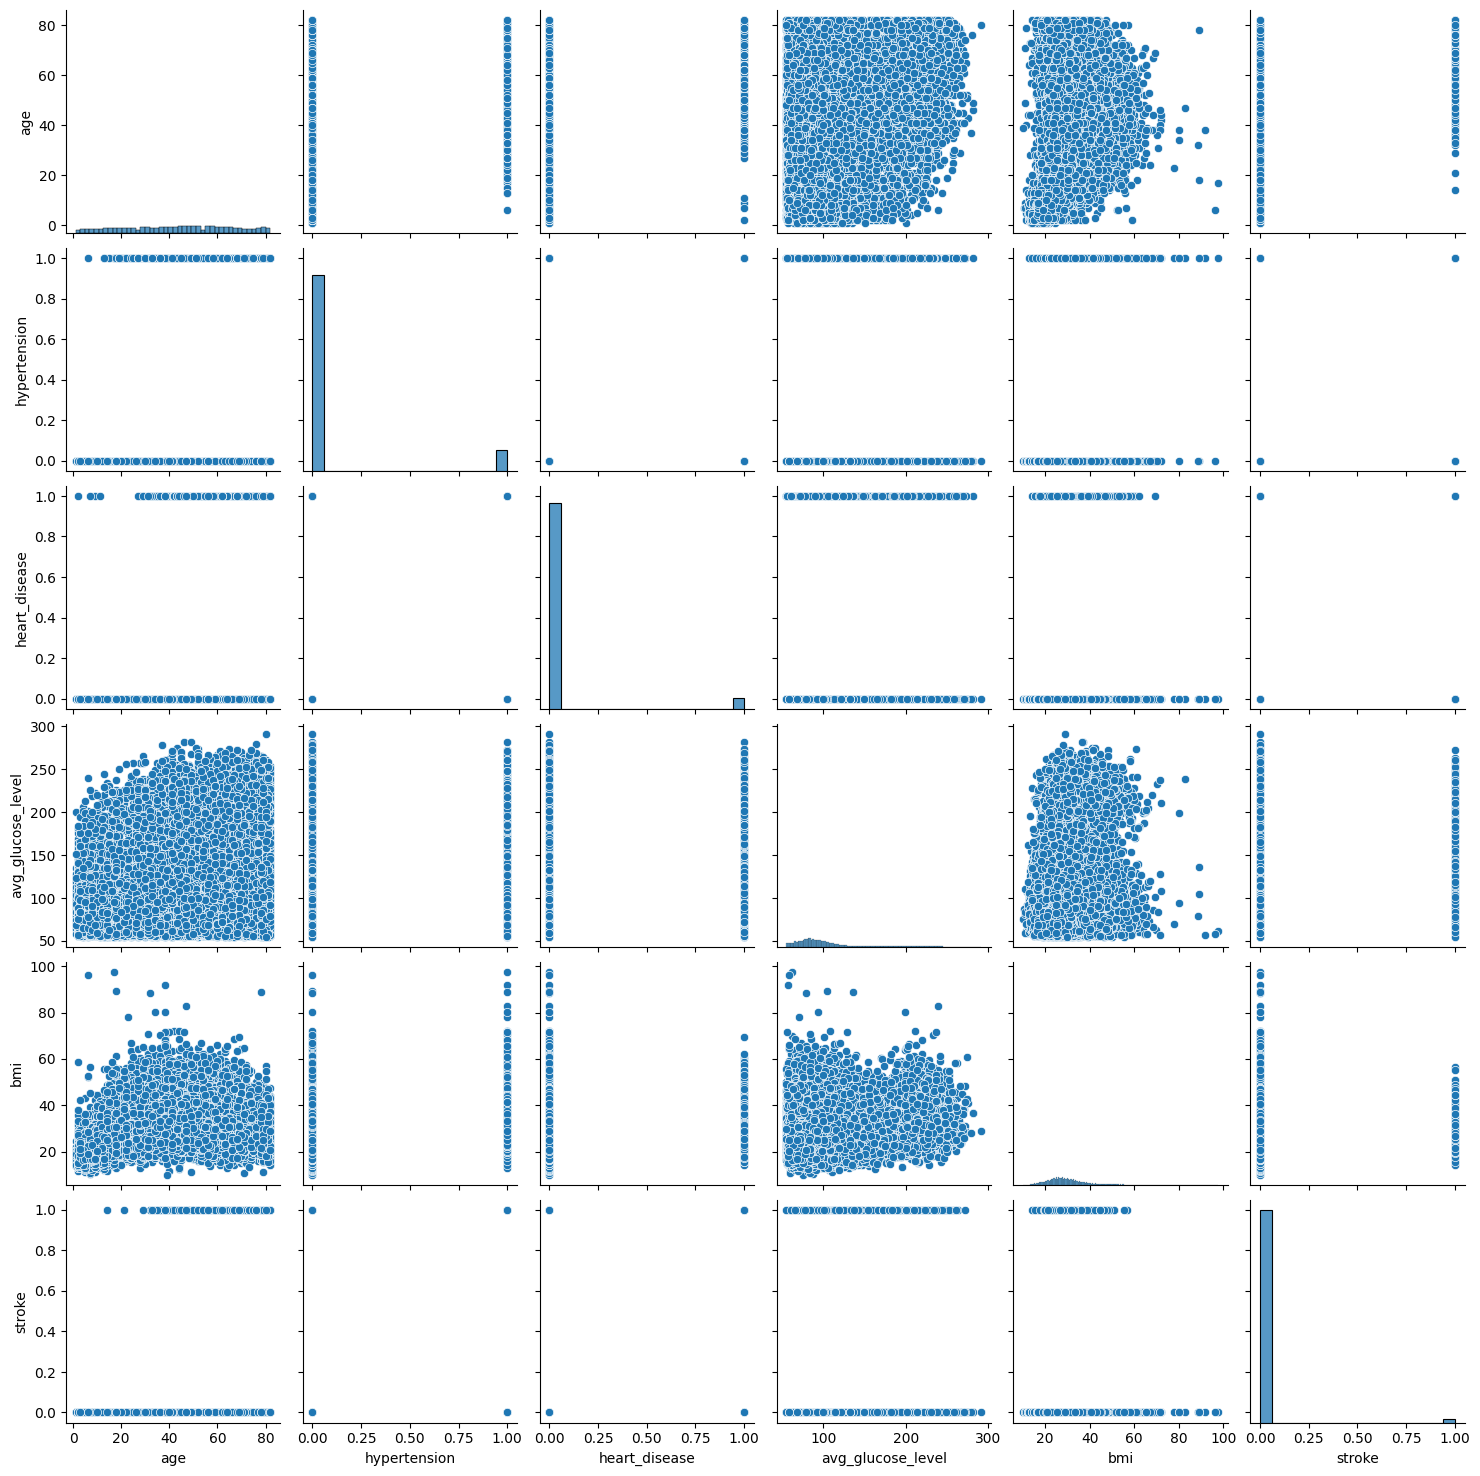

In [ ]:
sns.pairplot(df)
#no tocarlo

grafico de dispersion para seguir viendo las relaciones como la de bmi y stroke antes de eliminar, comprobamos que no hay.

son pocos datos pero como vimos que pueden afectar a otras variables vamos a comprobar haciendo histogramas de esas variables antes y después de borrarlos

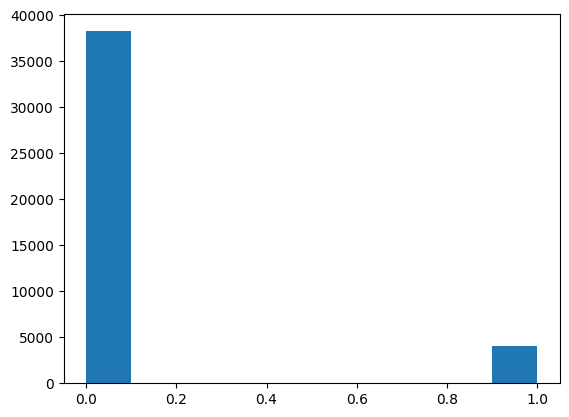

In [ ]:
plt.hist(df["hypertension"])
plt.show()
#no tocarlo

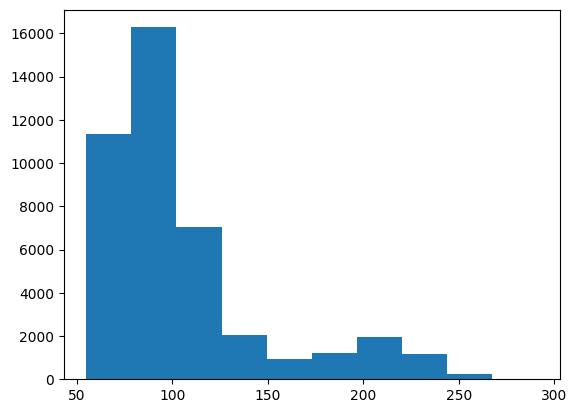

In [ ]:
plt.hist(df["avg_glucose_level"])
plt.show()
#no tocarlo

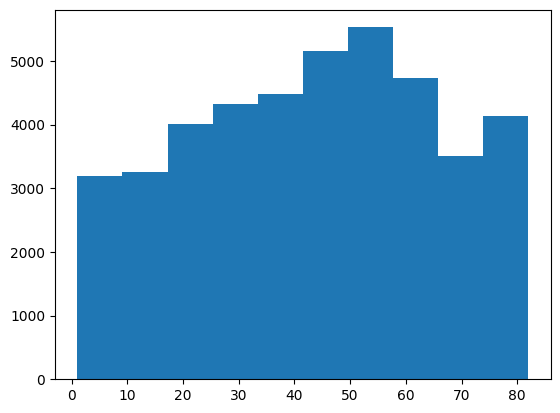

In [ ]:
plt.hist(df["age"])
plt.show()

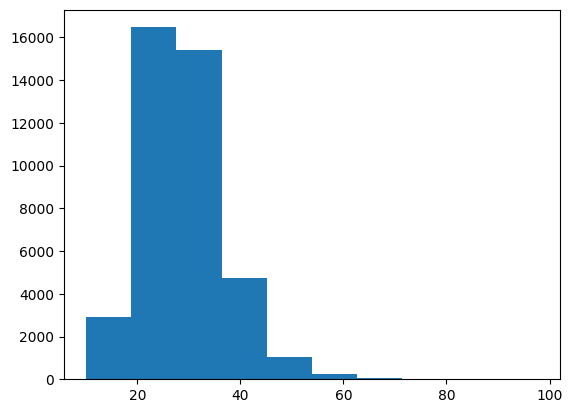

In [ ]:
plt.hist(df["bmi"])
plt.show()
#no tocarlo

vemos la distribucion de los datos antes de borrarlos

In [ ]:
valoresnonulos=df[df["bmi"].notna( )] #vemos los bmi que no son nulos
cantidaddepersonasconacv=df[df["stroke"]==1] #hay 782 personas con acv
valoresnonulosconacv=valoresnonulos[valoresnonulos["stroke"]==1] #hay 643 personas con acv con bmi registrado, es un 83%
valoresnonulosconacv
indicesaeliminar=df[df['bmi'].isna()].index
indicesaeliminar #comprobamos que vamos a eliminar los correctos
df = df.drop(indicesaeliminar)#borramos
df.shape#comprobamos que se hayan borrado

(40886, 11)

In [ ]:
df["bmi"].mean() #vemos que el promedio no cambie mucho luego de eliminar (no cambia)

28.878603923103267

<Axes: >

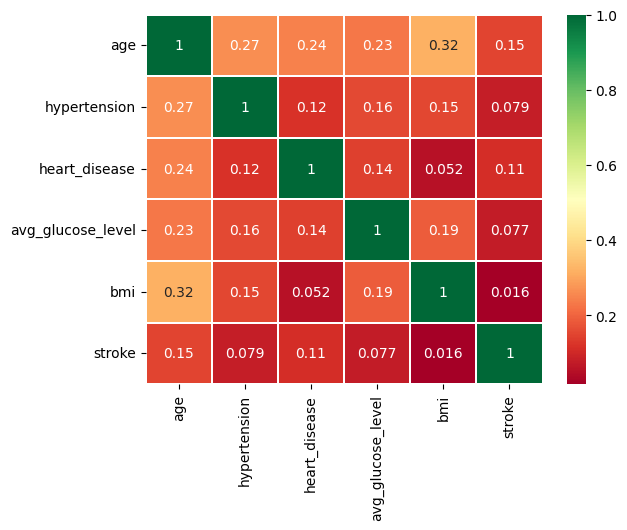

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

comprobamos que las relaciones no fueron modificadas (las de bmi no sin embargo algunas si se modificaron un poco pero no significativamente)



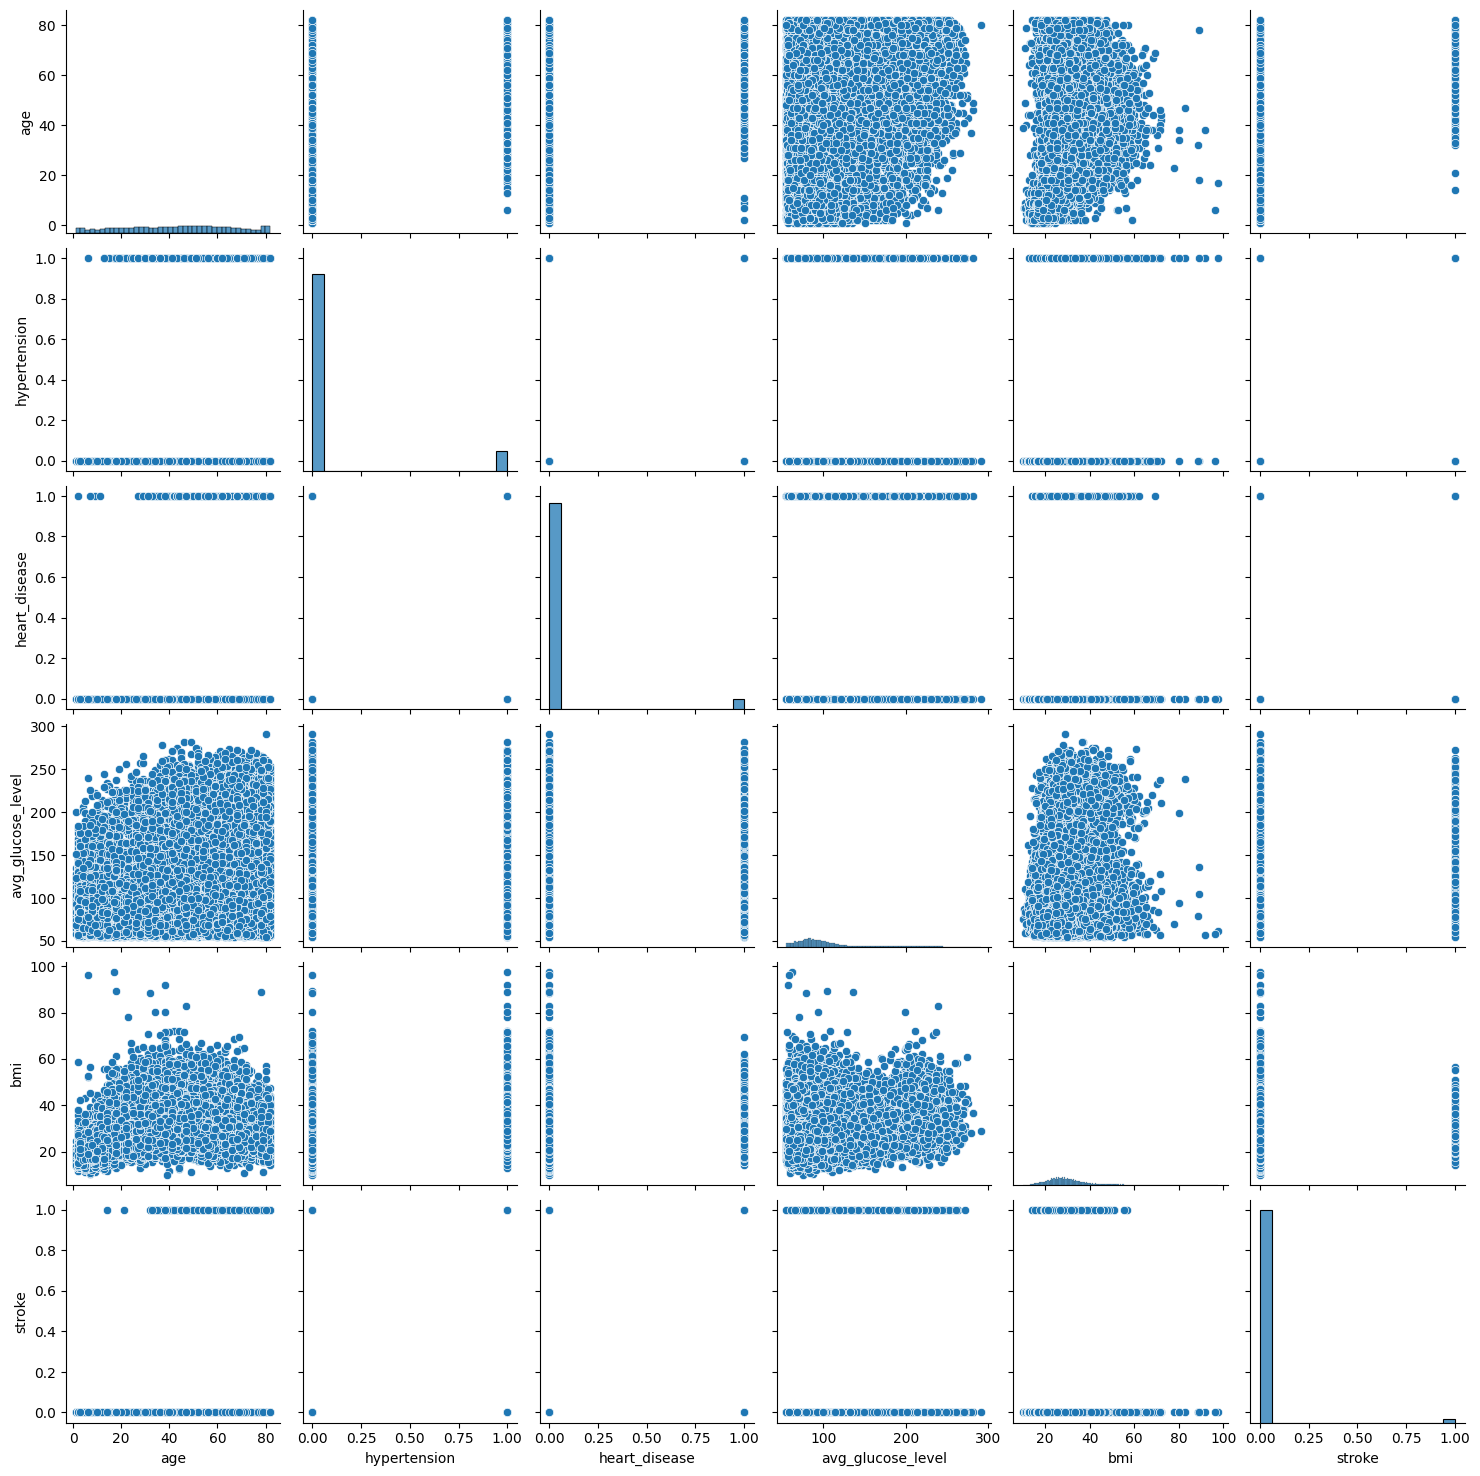

In [ ]:
sns.pairplot(df)

comprobamos que no hayan cambiado muchos las relaciones

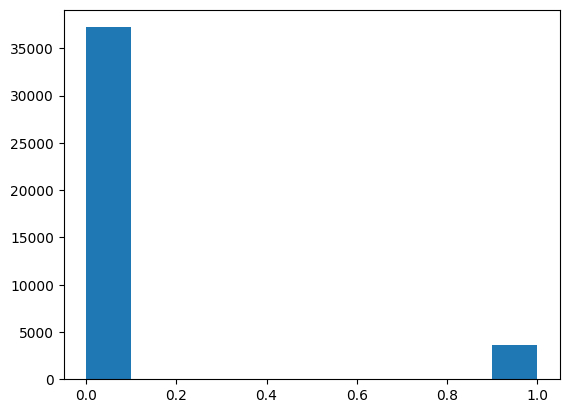

In [ ]:
plt.hist(df["hypertension"])
plt.show()
#no tocarlo

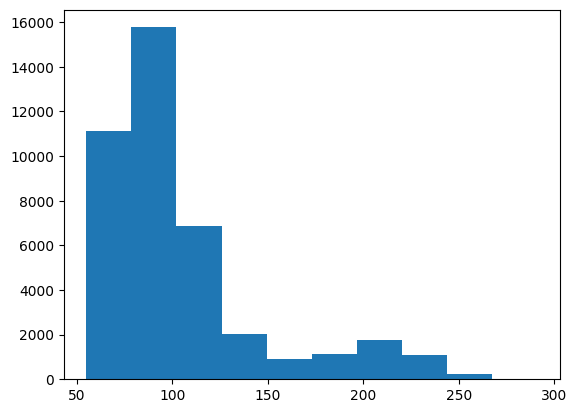

In [ ]:
plt.hist(df["avg_glucose_level"])
plt.show()
#no tocarlo

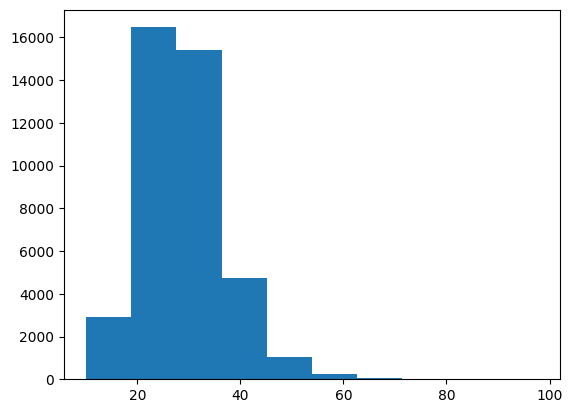

In [ ]:
plt.hist(df["bmi"])
plt.show()

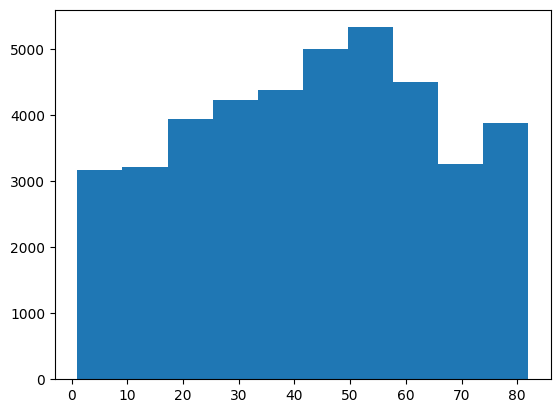

In [ ]:
plt.hist(df["age"])
plt.show()

comprobamos que la eliminación no provocó sesgo (nada)

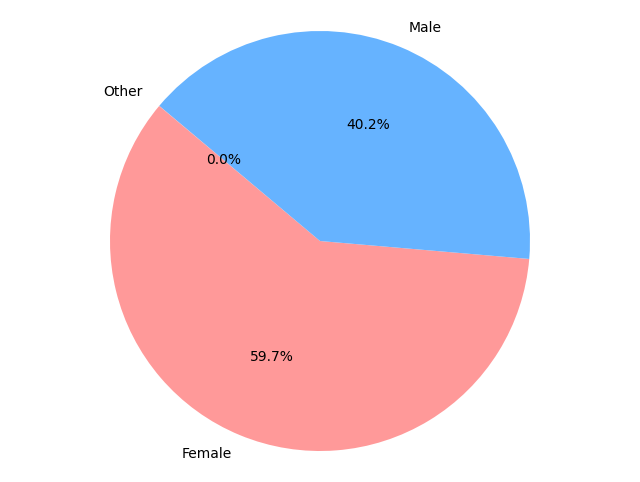

In [ ]:
#como entre los bmi habia algunos del genero other, revisamos como queda eso que de por si era minoria que representa el 0.1
cant_gen = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cant_gen, labels=cant_gen.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
#plt.title ('Distribución por Género')
plt.axis('equal')  # eso de equal parece que hace que los graficos sean redondos
plt.show()

In [ ]:
cant=df['gender'].value_counts() #hay 7 other, por lo que es en vano tenerlo
print (cant)

gender
Female    24429
Male      16450
Other         7
Name: count, dtype: int64


In [ ]:
#EJECUTAR
#borramos los other que quedan
indices_other = df[df['gender'] == 'Other'].index
df=df.drop(indices_other)


In [ ]:
df.shape

(40879, 11)

In [ ]:
otherahora=df[df["gender"]=="Other"]
otherahora

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [ ]:
df['gender'].value_counts()

gender
Female    24429
Male      16450
Name: count, dtype: int64

In [ ]:
df["bmi"].mean()

28.878771496367328

In [ ]:
fumadornonulo=df[df["smoking_status"].notna()] #hay 29065 con smoke registrado
fumadornonulo


gender  age  hypertension  heart_disease ever_married      work_type  \
1        Male   58             1              0          Yes        Private   
3      Female   70             0              0          Yes        Private   
6      Female   52             0              0          Yes        Private   
7      Female   75             0              1          Yes  Self employed   
8      Female   32             0              0          Yes        Private   
...       ...  ...           ...            ...          ...            ...   
43395  Female   10             0              0           No       Children   
43396  Female   56             0              0          Yes       Govt job   
43397  Female   82             1              0          Yes        Private   
43398    Male   40             0              0          Yes        Private   
43399  Female   82             0              0          Yes        Private   

      residence_type  avg_glucose_level   bmi   smoking_status  stroke  
1              Urban              87.96  39.2     Never smoked       0  
3              Rural              69.04  35.9  Formerly smoked       0  
6              Urban              77.59  17.7  Formerly smoked       0  
7              Rural             243.53  27.0     Never smoked       0  
8              Rural              77.67  32.3           Smokes       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     Never smoked       0  
43396          Urban             213.61  55.4  Formerly smoked       0  
43397          Urban              91.94  28.9  Formerly smoked       0  
43398          Urban              99.16  33.2     Never smoked       0  
43399          Urban              79.48  20.6     Never smoked       0  

[29065 rows x 11 columns]

In [ ]:
df["smoking_status"].value_counts() #un gran n° de los registrados nunca fumó.

smoking_status
Never smoked       15746
Formerly smoked     7093
Smokes              6226
Name: count, dtype: int64

In [ ]:
fumadornonulo


gender  age  hypertension  heart_disease ever_married      work_type  \
1        Male   58             1              0          Yes        Private   
3      Female   70             0              0          Yes        Private   
6      Female   52             0              0          Yes        Private   
7      Female   75             0              1          Yes  Self employed   
8      Female   32             0              0          Yes        Private   
...       ...  ...           ...            ...          ...            ...   
43395  Female   10             0              0           No       Children   
43396  Female   56             0              0          Yes       Govt job   
43397  Female   82             1              0          Yes        Private   
43398    Male   40             0              0          Yes        Private   
43399  Female   82             0              0          Yes        Private   

      residence_type  avg_glucose_level   bmi   smoking_status  stroke  
1              Urban              87.96  39.2     Never smoked       0  
3              Rural              69.04  35.9  Formerly smoked       0  
6              Urban              77.59  17.7  Formerly smoked       0  
7              Rural             243.53  27.0     Never smoked       0  
8              Rural              77.67  32.3           Smokes       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     Never smoked       0  
43396          Urban             213.61  55.4  Formerly smoked       0  
43397          Urban              91.94  28.9  Formerly smoked       0  
43398          Urban              99.16  33.2     Never smoked       0  
43399          Urban              79.48  20.6     Never smoked       0  

[29065 rows x 11 columns]

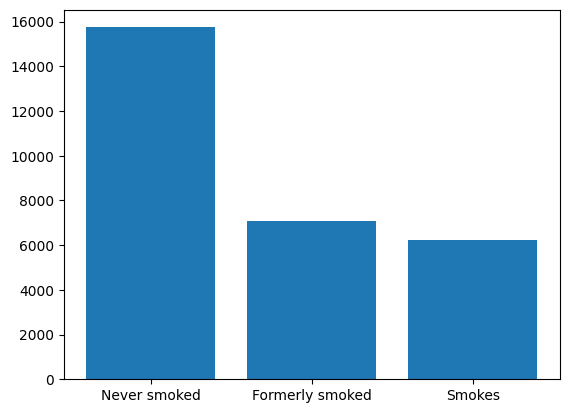

In [ ]:
valores=df["smoking_status"].value_counts().values
nombres=df["smoking_status"].value_counts().index
plt.bar(nombres,valores)
plt.show()
#no tocar

acá vemos como hay más que nunca fumaron.

In [ ]:
fumadornulo=df[df["smoking_status"].isna()]
fumadornulo #11814 son ahora que borramos datos
fumarporglucosaalto=fumadornulo[fumadornulo["avg_glucose_level"]>110]
fumarporglucosaalto #la mayoria de los datos faltantes de estado de fumar son de personas con el nivel de glucosa normal.
fumaryedad=fumadornulo[["smoking_status","age"]]
fumarmenores_df=fumaryedad[fumaryedad["age"]<24]
fumarmenores_df  #la mitad de los datos faltantes de fumar son de menores.
fumaryacv_df=fumadornulo[fumadornulo["stroke"]==0]
fumaryacv_df #el 99% datos faltantes de fumar son de personas que no tienen ACV.
fumarporgenero_df=fumadornulo[fumadornulo["gender"]=="Male"]
fumarporgenero_df#se reparte mas o menos mitad y mitad, hay mas mujeres.
fumaryhipertension=fumadornulo[fumadornulo["hypertension"]==0]
fumaryhipertension #casi todos de los datos faltantes de smoking son de los que no tienen hipertension.
fumaryheart=fumadornulo[fumadornulo["heart_disease"]==0] #casi todos de los datos faltantes de smoking son de los que no tienen cardiopatia.
fumaryheart
fumaryresidencia=fumadornulo[fumadornulo["residence_type"]=="Rural"]
fumaryresidencia #hay mitad y mitad en cuanto a tipos de residencias
fumarycasado=fumadornulo[fumadornulo["ever_married"]=="Yes"]
fumarycasado #se reparte mitad y mitad
fumarmenores_df

smoking_status  age
0                NaN    3
2                NaN    8
4                NaN   14
33               NaN    3
35               NaN   14
...              ...  ...
43376            NaN    3
43382            NaN    9
43389            NaN   14
43391            NaN    6
43392            NaN   18

[5767 rows x 2 columns]

([<matplotlib.axis.YTick at 0x79ec8559c430>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

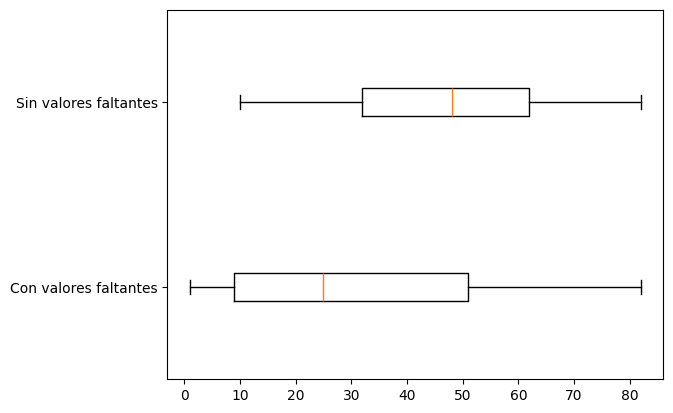

In [ ]:
BM_MV=df.smoking_status.isna() #devuelve false si los valores no son nulos y true si son nulos
MV_labels=["Con valores faltantes","Sin valores faltantes"] #lista con los titulos del grafico
box_sr=pd.Series(" ",index=BM_MV.unique()) #lista de valores unicos de bm
for poss in BM_MV.unique(): #itera sobre lo valores unicos de BM_MV
  BM = BM_MV == poss  #crea serie booleana donde si  poss es true cada valor va a ser true si el valor en BM_MV es True
  box_sr[poss]=df[BM].age #se actualiza box_sr donde si poss es true entonces box_sr en la posicion true contendra las temperaturas donde faltan datos
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

hay una diferencia pero no tan grave

([<matplotlib.axis.YTick at 0x79ec8559f2b0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

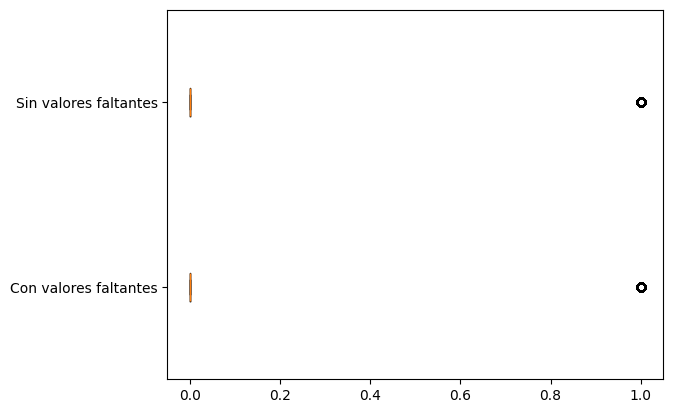

In [ ]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].heart_disease
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no hay diferencias

([<matplotlib.axis.YTick at 0x79ec856223e0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

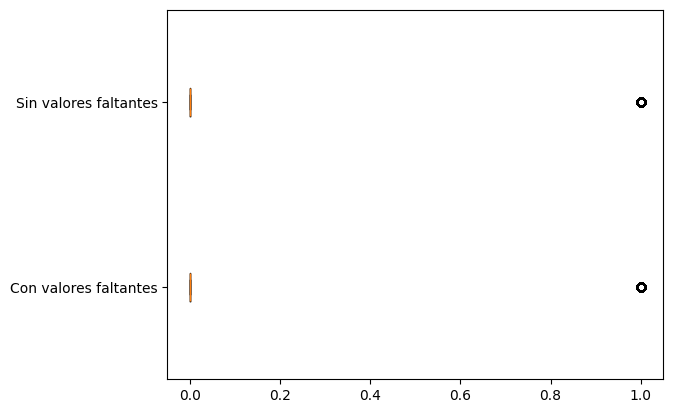

In [ ]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].hypertension
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no hay diferencias

([<matplotlib.axis.YTick at 0x79ec854a9b70>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

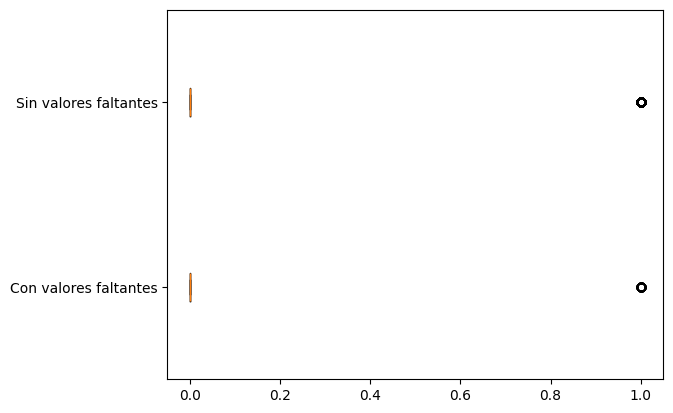

In [ ]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].stroke
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

no hay diferencias

([<matplotlib.axis.YTick at 0x79ec85524dc0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

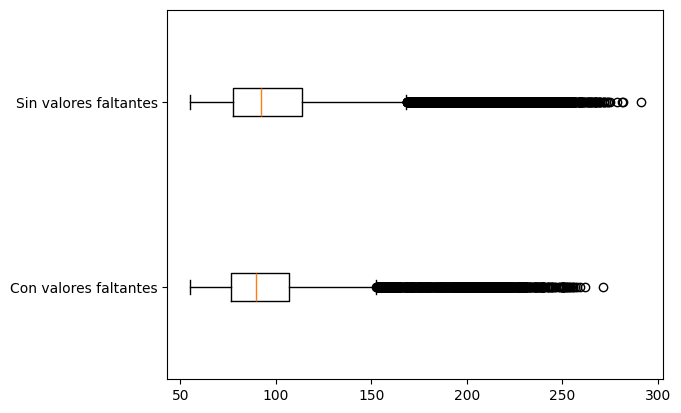

In [ ]:
#fumar y nivel de glucosa
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].avg_glucose_level
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

se observan diferencias pero no tan extremas

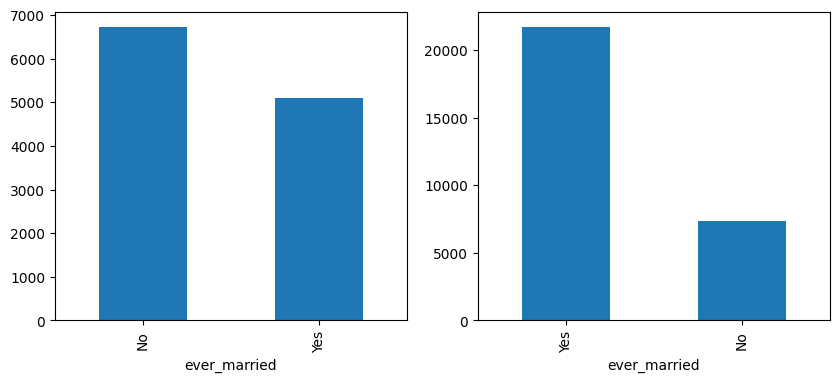

In [ ]:
#fumar y si esta casado
BM_MV=df.smoking_status.isna()
MV_labels=["Sin valores faltantes","Con valores faltantes"]
plt.figure(figsize=(10, 4))
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].ever_married.value_counts().plot.bar() #lo unico que cambia es el tipo de grafico y las escalas porque ahora no son numericas sino son nombres
plt.show()

hay una leve diferencia

In [ ]:
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
  plt.figure(figsize=(10,4))
  for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df[BM][str_att_name].value_counts().plot.bar()
BM_MV=df.smoking_status.isna()


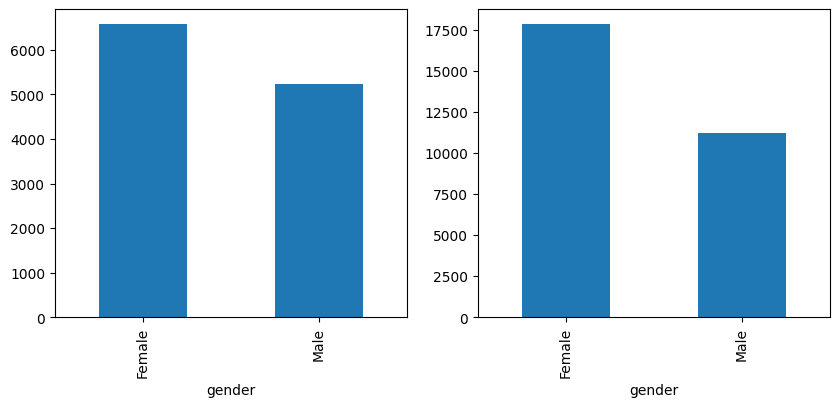

In [ ]:
Diagnose_MV_Categorical(df,'gender',BM_MV)

hay una leve diferencia

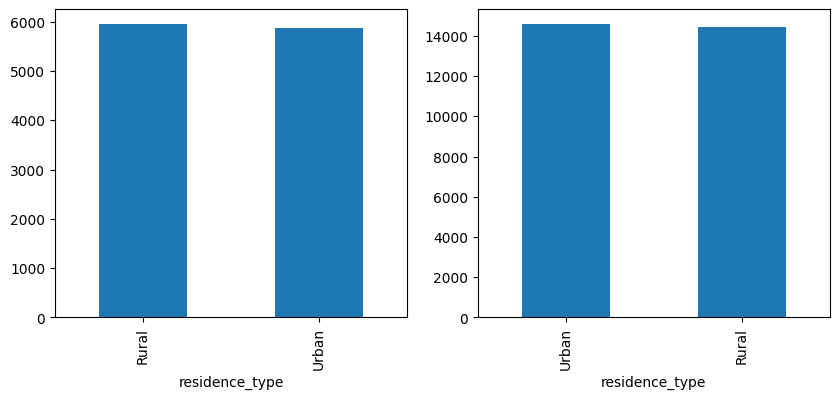

In [ ]:
Diagnose_MV_Categorical(df,'residence_type',BM_MV)

no hay diferencias

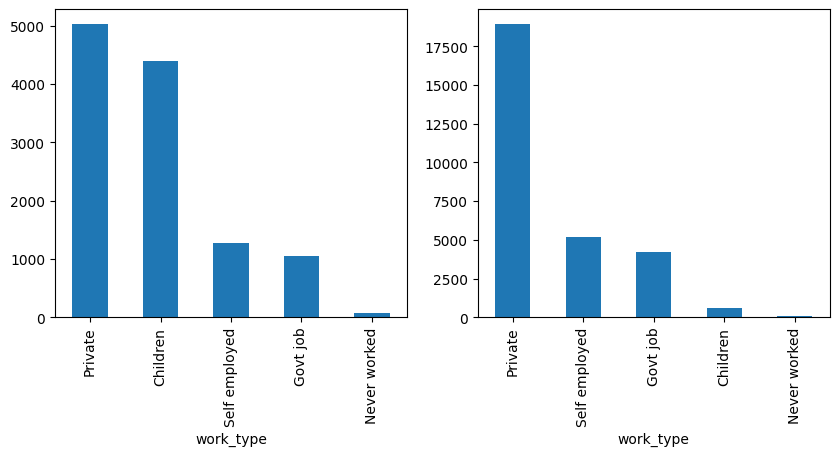

In [ ]:
Diagnose_MV_Categorical(df,'work_type',BM_MV)

hay una pequeña diferencia

In [ ]:
frecuencia=df["smoking_status"].value_counts()
mascomun=frecuencia.idxmax()
mascomun  #mas comun es que nunca hayan fumado


'Never smoked'

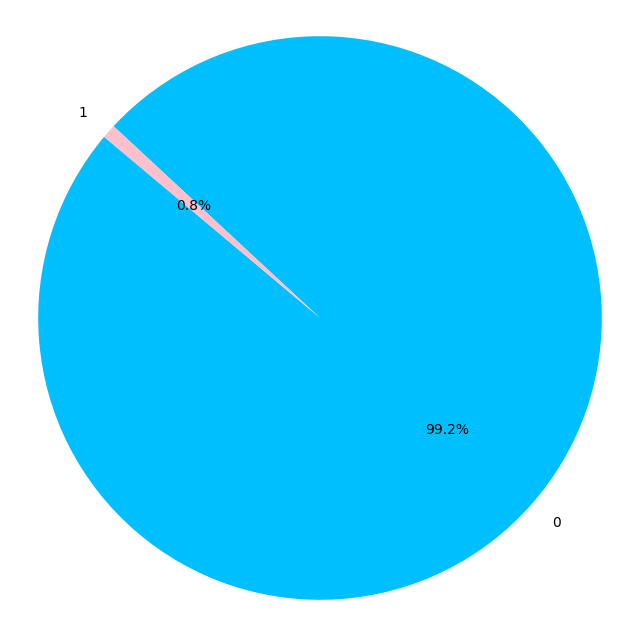

In [ ]:
df_ec = fumadornulo.groupby('stroke').size()
plt.figure(figsize=(8, 8))
plt.pie(df_ec, labels=df_ec.index, autopct='%1.1f%%', colors=['deepskyblue', 'pink'], startangle=140)
plt.axis('equal')
plt.show()

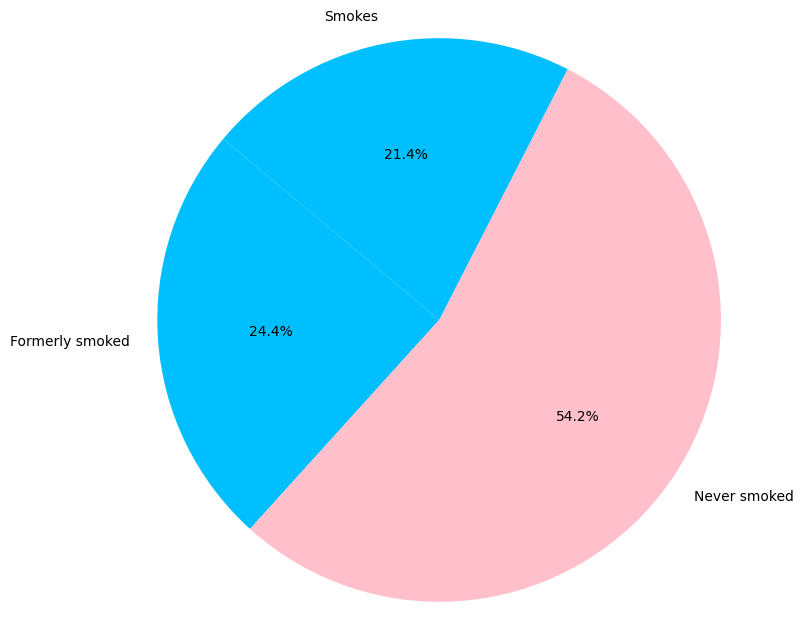

In [ ]:
df_ec = fumadornonulo.groupby('smoking_status').size()
plt.figure(figsize=(8, 8))
plt.pie(df_ec, labels=df_ec.index, autopct='%1.1f%%', colors=['deepskyblue', 'pink'], startangle=140)
plt.axis('equal')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x79ec852dfe80>,
 'caps': [<matplotlib.lines.Line2D at 0x79ec852de680>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ec852ddb10>],
 'medians': [<matplotlib.lines.Line2D at 0x79ec852debf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ec852def50>],
 'means': []}

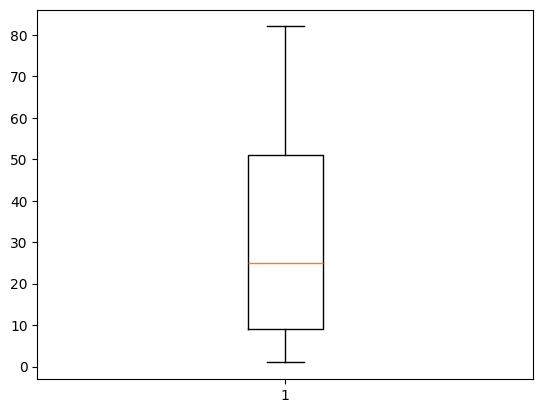

In [ ]:
plt.boxplot(fumadornulo["age"])

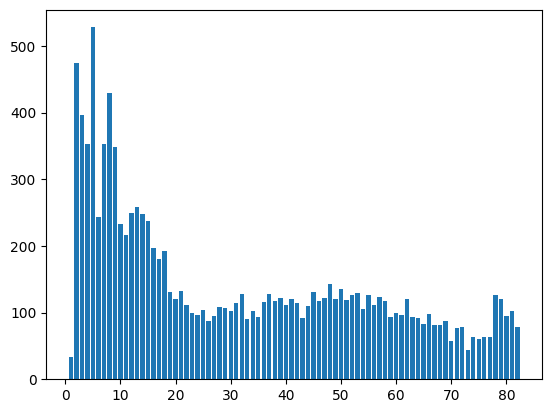

In [ ]:
#edad y valores nulos de fumador
valores=fumadornulo["age"].value_counts().values
nombres=fumadornulo["age"].value_counts().index
plt.bar(nombres,valores)
plt.show()


In [ ]:
#EJECUTAR
df['smoking_status'].fillna("No smokes",inplace=True) #reemplazamos a los que tienen vacio por no fuman.

In [ ]:
comprobacionvaloresnulos=df['smoking_status'].isna().sum()
comprobacionvaloresnulos

0

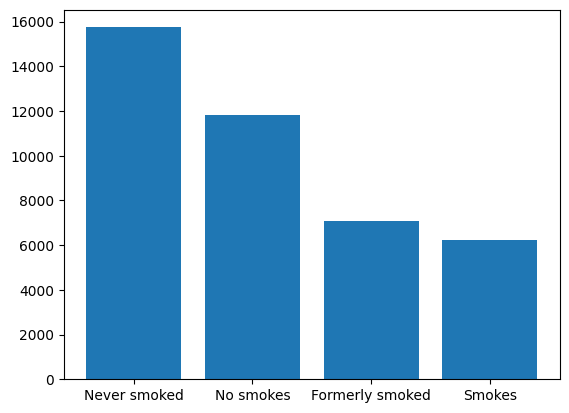

In [ ]:
valores=df["smoking_status"].value_counts().values
nombres=df["smoking_status"].value_counts().index
plt.bar(nombres,valores)
plt.show()

In [ ]:
df.shape

(40879, 11)

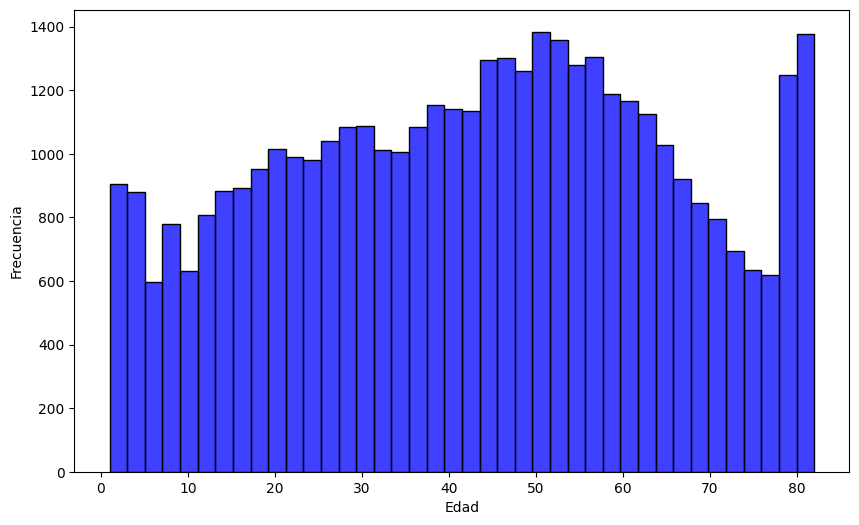

In [ ]:
#frecuencia de las edades en las que se tiene desordenes cardiacos
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], color='blue')
#plt.title('Distribución de Edad en Personas con Desordenes Cardíacos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



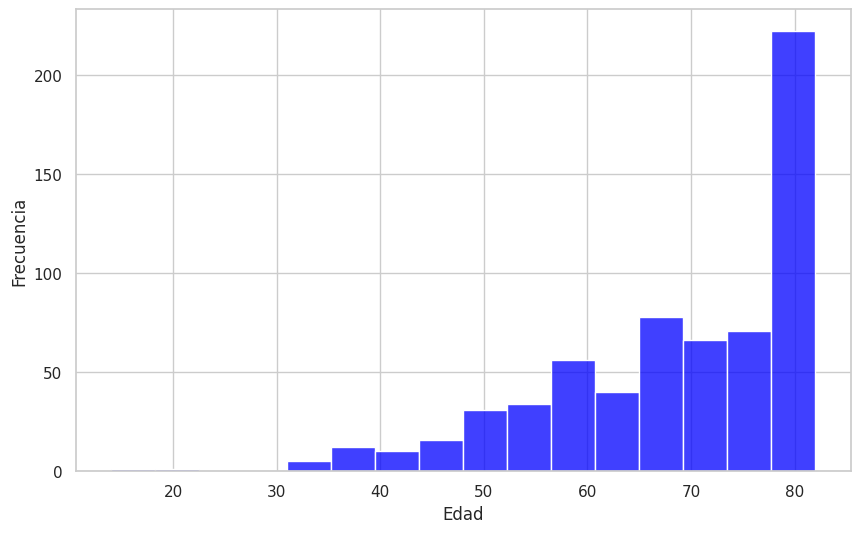

In [ ]:
df_stroke = df[df['stroke'] == 1]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_stroke['age'], color='blue')
#plt.title('Distribución de Edad en Personas que Sufrieron un Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

ANALIS UNIVARIADO Y BIVARIADO

In [ ]:
profile = ProfileReport(df, title="ACV")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
frecuencia_ec= df['ever_married'].value_counts()
frecuencia_ec

ever_married
Yes    26781
No     14098
Name: count, dtype: int64

In [ ]:
frecuencia_ec_relativa=df['ever_married'].value_counts(normalize=True) * 100
frecuencia_ec_relativa


ever_married
Yes    65.512855
No     34.487145
Name: proportion, dtype: float64

In [ ]:
moda = df['ever_married'].mode()
moda

0    Yes
Name: ever_married, dtype: object

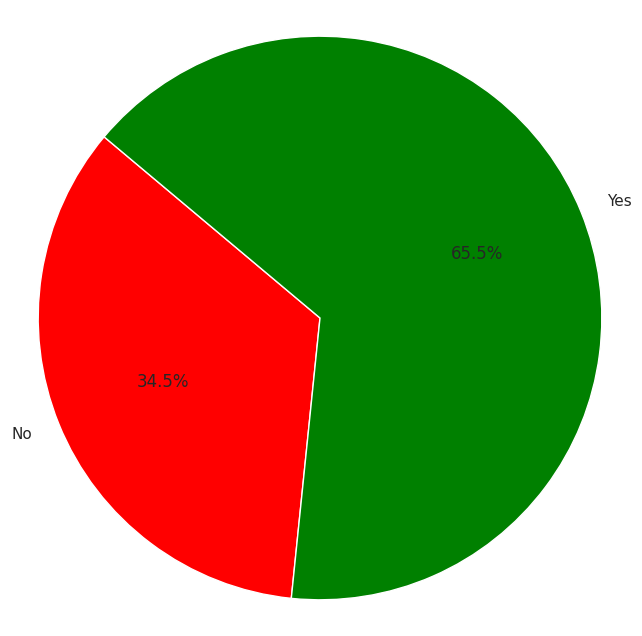

In [ ]:
df_ec = df.groupby('ever_married').size()
plt.figure(figsize=(8, 8))
plt.pie(df_ec, labels=df_ec.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=140)
#plt.title("¿Alguna vez estuvieron casados?")
plt.axis('equal')
plt.show()

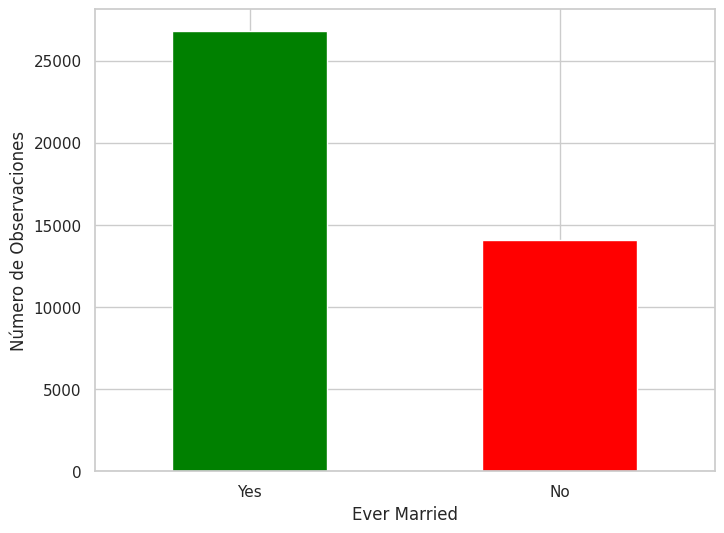

In [ ]:
plt.figure(figsize=(8, 6))
df['ever_married'].value_counts().plot(kind='bar', color=['green', 'red'])
#plt.title('Distribución de Ever Married')
plt.xlabel('Ever Married')
plt.ylabel('Número de Observaciones')
plt.xticks(rotation=0)
plt.show()

In [ ]:
frecuencia_trabajo=df['work_type'].value_counts()
frecuencia_trabajo

work_type
Private          23980
Self employed     6474
Govt job          5243
Children          5006
Never worked       176
Name: count, dtype: int64

In [ ]:
moda_trabajo=df['work_type'].mode()
moda_trabajo

0    Private
Name: work_type, dtype: object

In [ ]:
frecuencia_relativa_trabajo=df['work_type'].value_counts(normalize=True)*100
frecuencia_relativa_trabajo

work_type
Private          58.660926
Self employed    15.836982
Govt job         12.825656
Children         12.245896
Never worked      0.430539
Name: proportion, dtype: float64

In [ ]:
#df.drop(['avg_glucose_level','residence_type','ever_married','work_type'],axis='columns',inplace=True)


In [ ]:
df.drop(['residence_type','ever_married','work_type'],axis='columns',inplace=True)


In [ ]:
df

gender  age  hypertension  heart_disease  avg_glucose_level   bmi  \
0        Male    3             0              0              95.12  18.0   
1        Male   58             1              0              87.96  39.2   
2      Female    8             0              0             110.89  17.6   
3      Female   70             0              0              69.04  35.9   
4        Male   14             0              0             161.28  19.1   
...       ...  ...           ...            ...                ...   ...   
43395  Female   10             0              0              58.64  20.4   
43396  Female   56             0              0             213.61  55.4   
43397  Female   82             1              0              91.94  28.9   
43398    Male   40             0              0              99.16  33.2   
43399  Female   82             0              0              79.48  20.6   

        smoking_status  stroke  
0            No smokes       0  
1         Never smoked       0  
2            No smokes       0  
3      Formerly smoked       0  
4            No smokes       0  
...                ...     ...  
43395     Never smoked       0  
43396  Formerly smoked       0  
43397  Formerly smoked       0  
43398     Never smoked       0  
43399     Never smoked       0  

[40879 rows x 8 columns]

## BMI en funcion de'age', 'smoking_status', 'stroke', 'hypertension', 'avg_glucose_level', 'heart_disease'

Mean Squared Error: 4.834975361517647
Root Mean Squared Error (RMSE): 2.1988577401727576


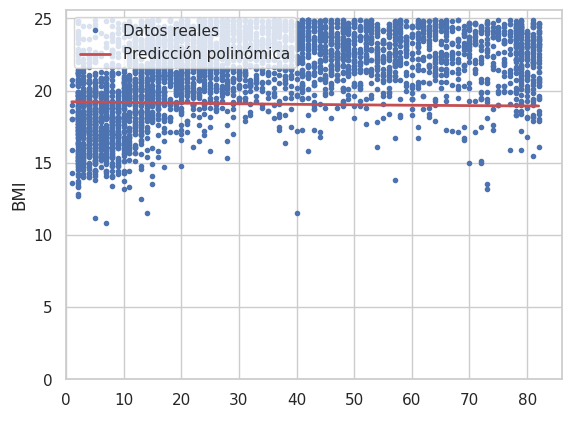

In [ ]:
# Balancear el dataset
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
df['smoking_status'] = df['smoking_status'].replace({'Never smoked': 0, 'Formerly smoked': 1, 'Smokes': 2, 'No smokes': 3})

"""df_stroke = df[df['stroke'] == 1]
df_no_stroke = df[df['stroke'] == 0]
balanced_df = pd.concat([
    resample(df_stroke, replace=True, n_samples=600, random_state=42),
    resample(df_no_stroke, replace=True, n_samples=600, random_state=42)
])"""

dataset2_bmi = df[df['bmi'] <25 ]

X= dataset2_bmi[['age','avg_glucose_level','hypertension', 'heart_disease', 'stroke', 'smoking_status']]
y = dataset2_bmi['bmi']    # Variable objetivo (por ejemplo, BMI)

#X = balanced_df[['age', 'smoking_status', 'stroke', 'hypertension', 'avg_glucose_level', 'heart_disease']]
#y = balanced_df['bmi']

# Características polinómicas
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)

X_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 600).reshape(-1, 1)


X_range_like_X_test = np.zeros((X_range.shape[0], X.shape[1]))
X_range_like_X_test[:, 1] = X_range[:, 0]


X_range_poly = poly_features.transform(X_range_like_X_test)

# Gráfico
plt.plot(X_test[:, 1], y_test, "b.", label="Datos reales")  # Puntos de prueba
plt.plot(X_range, model.predict(X_range_poly), "r-", label="Predicción polinómica", linewidth=2)
plt.xlabel(" ")
plt.ylabel("BMI")
plt.gca().set_xlim(left=0)  # Limitar el eje X a valores positivos
plt.gca().set_ylim(bottom=0)  # Limitar el eje Y a valores positivos

plt.legend(loc="upper left")
plt.show()